In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/opt/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
diamonds = pd.read_csv('../data/diamonds_train.csv')
diamonds_predict = pd.read_csv('../data/diamonds_predict.csv')

In [17]:
target = 'price'
cat_features = ['cut', 'color', 'clarity']
num_features = ['carat', 'depth', 'table']

In [3]:
y = diamonds.price

In [4]:
x = diamonds.drop(['price'], axis=1)

,carat,depth,table,x,y,z
carat,1.000000,0.026528,0.183392,0.975688,0.951667,0.967570
depth,0.026528,1.000000,-0.293114,-0.026348,-0.030966,0.094655
table,0.183392,-0.293114,1.000000,0.196059,0.184673,0.155189
x,0.975688,-0.026348,0.196059,1.000000,0.973712,0.984876
y,0.951667,-0.030966,0.184673,0.973712,1.000000,0.964828
z,0.967570,0.094655,0.155189,0.984876,0.964828,1.000000


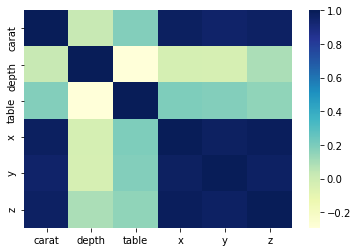

In [5]:
corr = x.corr()
display(x.corr())
plt.figure()
sns.heatmap(corr, cmap='YlGnBu')

In [6]:
x = pd.get_dummies(x)

In [7]:
display(x.corr())

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,0.026528,0.183392,0.975688,0.951667,0.967570,0.092438,0.031092,-0.167509,0.120642,...,0.160282,0.183283,0.125381,-0.115349,0.063355,0.271281,-0.067258,-0.040117,-0.165871,-0.139410
depth,0.026528,1.000000,-0.293114,-0.026348,-0.030966,0.094655,0.282748,0.144322,-0.028362,-0.200219,...,0.027973,0.025880,0.087288,-0.031049,0.042043,0.008609,-0.021677,-0.011976,-0.027654,-0.021127
table,0.183392,-0.293114,1.000000,0.196059,0.184673,0.155189,0.124266,0.170398,-0.546912,0.336919,...,0.017346,0.036459,0.042091,-0.078284,0.051065,0.094244,-0.030222,-0.010142,-0.062731,-0.059755
x,0.975688,-0.026348,0.196059,1.000000,0.973712,0.984876,0.081355,0.026772,-0.166217,0.130961,...,0.144014,0.167699,0.111291,-0.127082,0.079783,0.274468,-0.064974,-0.035746,-0.182383,-0.149569
y,0.951667,-0.030966,0.184673,0.973712,1.000000,0.964828,0.069342,0.028432,-0.157092,0.112749,...,0.140109,0.163393,0.103261,-0.121710,0.076390,0.267469,-0.062276,-0.036140,-0.176126,-0.143768
z,0.967570,0.094655,0.155189,0.984876,0.964828,1.000000,0.113199,0.043097,-0.164513,0.095518,...,0.145546,0.170446,0.117625,-0.128063,0.083128,0.271004,-0.065645,-0.037092,-0.182269,-0.149285
cut_Fair,0.092438,0.282748,0.124266,0.081355,0.069342,0.113199,1.000000,-0.055569,-0.144077,-0.102659,...,0.009520,0.017212,0.179198,-0.026746,0.006335,0.056677,-0.024516,-0.030396,-0.038622,-0.030899
cut_Good,0.031092,0.144322,0.170398,0.026772,0.028432,0.043097,-0.055569,1.000000,-0.258134,-0.183928,...,0.007742,0.017023,0.014724,-0.033443,0.057257,0.042210,-0.016949,-0.022023,-0.038915,-0.037793
cut_Ideal,-0.167509,-0.028362,-0.546912,-0.166217,-0.157092,-0.164513,-0.144077,-0.258134,1.000000,-0.476881,...,-0.013232,-0.038084,-0.048536,0.106742,-0.085355,-0.110461,0.039261,0.016469,0.086975,0.075013
cut_Premium,0.120642,-0.200219,0.336919,0.130961,0.112749,0.095518,-0.102659,-0.183928,-0.476881,1.000000,...,0.007098,0.018343,0.004469,-0.055995,0.024776,0.065704,-0.014231,0.025647,-0.053624,-0.061837


In [19]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

Xpr = tr.fit_transform(x)
Xpr = pd.DataFrame(Xpr,columns=x.columns)
Xpr.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.155103,0.080864,0.044362,0.175103,0.164938,0.182948,-0.031506,-0.056447,-0.146353,0.306896,...,-0.059521,0.756963,-0.021252,-0.032945,-0.100801,-0.081328,-0.075134,0.328624,-0.048539,-0.057592
1,-0.217546,0.188644,-0.043257,-0.265661,-0.255499,-0.244551,-0.038139,-0.068331,-0.177166,-0.126236,...,-0.072052,-0.051180,-0.025727,-0.039881,-0.122024,-0.098451,-0.090953,0.397812,-0.058758,-0.069717
2,-0.025282,0.358765,-0.150126,-0.013336,-0.024246,0.022191,0.778342,-0.043252,-0.112142,-0.079904,...,-0.045607,-0.032396,-0.016284,-0.025244,-0.077238,-0.062317,0.326378,-0.074621,-0.037192,-0.044129
3,-0.151749,0.266137,-0.120512,-0.173704,-0.164405,-0.143430,-0.032779,0.589883,-0.152269,-0.108496,...,-0.061927,-0.043988,-0.022112,-0.034277,0.330324,-0.084616,-0.078172,-0.101322,-0.050501,-0.059920
4,0.125680,-0.235268,0.187046,0.196210,0.182230,0.159237,-0.047349,-0.084833,0.328638,-0.156721,...,-0.089453,-0.063540,-0.031940,-0.049512,0.477149,-0.122227,-0.112918,-0.146359,-0.072948,-0.086553


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Xpr, y, test_size=0.25)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30341, 26)
(10114, 26)
(30341,)
(10114,)


In [22]:
model = RandomForestRegressor(n_estimators=900, max_depth=15, min_samples_leaf=20, random_state=42, n_jobs = -1)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=20, n_estimators=900,
                      n_jobs=-1, random_state=42)

ERRORS

In [23]:
#print('ERRORS SUMMARY')
#print('MSE:', mean_squared_error(y_test, model.predict(x_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
#print('MSLE:', mean_squared_log_error(y_test, model.predict(x_test)))
#print('MAE:', mean_absolute_error(y_test, model.predict(x_test)))
#print('R2:', r2_score(y_test, model.predict(x_test)))

RMSE: 633.3859985318343


TEST

In [13]:
#diamonds_predict = pd.read_csv('../data/diamonds_predict.csv') ya lo hemos leido al principio
diamonds_predict = diamonds_predict.set_index('id')
diamonds_predict.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


In [14]:
diamonds_predict.shape

(13485, 9)

In [15]:
diamonds_predict = pd.get_dummies(diamonds_predict)

In [16]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

xpr1 = tr.fit_transform(diamonds_predict)
xpr1 = pd.DataFrame(xpr1,columns=diamonds_predict.columns)

In [17]:
xpr1.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.004594,0.167051,0.279926,0.018719,0.033245,0.043189,-0.043231,-0.079508,-0.201752,-0.148611,...,-0.084587,-0.056963,-0.028858,-0.047049,0.436950,-0.112108,-0.107314,-0.133754,-0.065968,-0.080350
1,0.149201,-0.089854,-0.038246,0.168208,0.177873,0.151942,-0.030232,-0.055600,0.215798,-0.103924,...,-0.059152,0.764313,-0.020181,-0.032902,-0.099640,-0.078398,0.405706,-0.093535,-0.046132,-0.056189
2,0.322915,0.063102,0.308285,0.290001,0.275185,0.275946,-0.034045,-0.062613,-0.158883,0.329920,...,-0.066614,-0.044859,-0.022726,-0.037052,0.344105,-0.088287,-0.084511,-0.105333,-0.051951,-0.063277
3,0.049150,0.326828,-0.355129,0.072260,0.078733,0.111014,-0.039435,-0.072527,-0.184039,-0.135563,...,-0.077160,-0.051962,-0.026325,-0.042918,0.398586,-0.102265,-0.097892,-0.122010,-0.060176,-0.073296
4,-0.146590,0.186357,0.052492,-0.142020,-0.132638,-0.111412,-0.039918,-0.073416,-0.186293,-0.137224,...,-0.078106,-0.052599,-0.026647,-0.043444,-0.131567,-0.103518,0.535702,-0.123505,-0.060913,-0.074194


In [20]:
y_pred =  model.predict(xpr1)

In [21]:
xpr1['price']=y_pred

In [22]:
submission_1509_v2 = xpr1[['price']]

In [23]:
submission_1509_v2.index.name='id'

In [27]:
submission_1509_v2.describe()

,price
count,13485.000000
mean,3945.933903
std,3939.752813
min,381.752299
25%,944.127929
50%,2428.062924
75%,5329.491999
max,18037.278429


In [28]:
submission_1509_v2.price.clip(0, 20000, inplace=True)

/opt/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/pandas/core/generic.py:7363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [29]:
submission_1509_v2.to_csv('submission_1509_v2')